In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA

In [49]:
df = pd.read_excel(r"C:\Users\dell6\Downloads\project_02.xlsx")
df.head()

,Rest_id,Rest_Name,Unnamed: 2,Price_for_two,Price for two,Price for one,Cuisines,Cuisine,Location,Delivery_review_no,URL
0,1,Hotel Empire,4.3,₹450 for two,450,225.0,"North Indian, Kebabs",North Indian,Brigade Road,10000.0,https://www.swiggy.com/restaurants/dilwale-res...
1,2,Protein Station,NEW,₹400 for two,400,200.0,"Healthy Food, Salads",Healthy Food,Basavanagudi,NaN,https://www.swiggy.com/restaurants/dilwale-res...
2,3,Halli Donne Biryani,3.9,₹200 for two,200,100.0,South Indian,South Indian,Koramangala,1000.0,https://www.swiggy.com/restaurants/dilwale-res...
3,4,Edesia by Freshmenu,3.9,₹150 for two,150,75.0,"Desserts, Bakery",Desserts,Richmond Town,150.0,https://www.swiggy.com/restaurants/dilwale-res...
4,5,Mangalore Sea Palate,4.1,₹300 for two,300,150.0,"Seafood, South Indian",Seafood,Jaya Nagar,150.0,https://www.swiggy.com/restaurants/dilwale-res...


In [50]:
df.shape

(1366, 11)

In [51]:
df[df.duplicated()]

,Rest_id,Rest_Name,Unnamed: 2,Price_for_two,Price for two,Price for one,Cuisines,Cuisine,Location,Delivery_review_no,URL


In [52]:
df.rename(columns={'Unnamed: 2':'Ratings'},inplace = True)

In [53]:
df.head()

,Rest_id,Rest_Name,Ratings,Price_for_two,Price for two,Price for one,Cuisines,Cuisine,Location,Delivery_review_no,URL
0,1,Hotel Empire,4.3,₹450 for two,450,225.0,"North Indian, Kebabs",North Indian,Brigade Road,10000.0,https://www.swiggy.com/restaurants/dilwale-res...
1,2,Protein Station,NEW,₹400 for two,400,200.0,"Healthy Food, Salads",Healthy Food,Basavanagudi,NaN,https://www.swiggy.com/restaurants/dilwale-res...
2,3,Halli Donne Biryani,3.9,₹200 for two,200,100.0,South Indian,South Indian,Koramangala,1000.0,https://www.swiggy.com/restaurants/dilwale-res...
3,4,Edesia by Freshmenu,3.9,₹150 for two,150,75.0,"Desserts, Bakery",Desserts,Richmond Town,150.0,https://www.swiggy.com/restaurants/dilwale-res...
4,5,Mangalore Sea Palate,4.1,₹300 for two,300,150.0,"Seafood, South Indian",Seafood,Jaya Nagar,150.0,https://www.swiggy.com/restaurants/dilwale-res...


In [54]:
df=df.drop(['Rest_id','Rest_Name','Price_for_two','Price for two','Cuisines','URL'],axis=1)

In [55]:
df.head()

,Ratings,Price for one,Cuisine,Location,Delivery_review_no
0,4.3,225.0,North Indian,Brigade Road,10000.0
1,NEW,200.0,Healthy Food,Basavanagudi,NaN
2,3.9,100.0,South Indian,Koramangala,1000.0
3,3.9,75.0,Desserts,Richmond Town,150.0
4,4.1,150.0,Seafood,Jaya Nagar,150.0


In [56]:
df.dtypes

Ratings                object
Price for one         float64
Cuisine                object
Location               object
Delivery_review_no    float64
dtype: object

In [57]:
df['Ratings'].sort_values().unique()

array(['--', '1.3', '2.1', '2.3', '2.4', '2.5', '2.6', '2.8', '2.9',
       '3.0', '3.1', '3.2', '3.3', '3.4', '3.5', '3.6', '3.7', '3.8',
       '3.9', '4.0', '4.1', '4.2', '4.3', '4.4', '4.5', '4.6', '4.7',
       '4.8', '4.9', '5.0', 'NEW'], dtype=object)

In [58]:
df['Ratings']=df['Ratings'].replace(['--','NEW'],np.nan)

In [59]:
df['Ratings']=df['Ratings'].astype(float)

<AxesSubplot:>

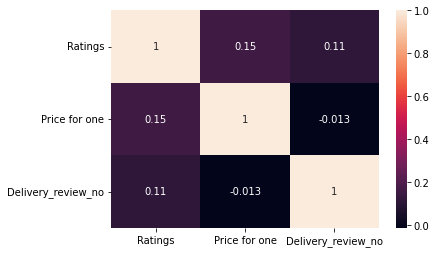

In [60]:
sns.heatmap(df.corr(),annot=True)

In [61]:
df.describe()

,Ratings,Price for one,Delivery_review_no
count,1077.000000,1366.000000,1220.000000
mean,4.074280,175.682650,1284.113115
std,0.414444,120.114615,2738.195032
min,1.300000,1.000000,2.000000
25%,3.900000,100.000000,50.000000
50%,4.100000,150.000000,150.000000
75%,4.300000,222.500000,1000.000000
max,5.000000,1000.000000,10000.000000


In [62]:
df.isnull().sum()

Ratings               289
Price for one           0
Cuisine                 0
Location                0
Delivery_review_no    146
dtype: int64

In [63]:
df['Ratings']=df['Ratings'].fillna(df['Ratings'].mean())

In [64]:
df['Delivery_review_no']=df['Delivery_review_no'].fillna(df['Delivery_review_no'].median())

In [65]:
df.isnull().sum()

Ratings               0
Price for one         0
Cuisine               0
Location              0
Delivery_review_no    0
dtype: int64

In [66]:
df['Delivery_review_no']=df['Delivery_review_no'].astype(int)

In [67]:
df['Ratings']=round(df['Ratings'],1)

In [68]:
df.head()

,Ratings,Price for one,Cuisine,Location,Delivery_review_no
0,4.3,225.0,North Indian,Brigade Road,10000
1,4.1,200.0,Healthy Food,Basavanagudi,150
2,3.9,100.0,South Indian,Koramangala,1000
3,3.9,75.0,Desserts,Richmond Town,150
4,4.1,150.0,Seafood,Jaya Nagar,150


In [69]:
df['Location'].nunique()

66

In [70]:
df['Cuisine'].nunique()

63

In [71]:
# Average price for each cuisine
df.groupby('Cuisine')['Price for one'].mean().reset_index()

,Cuisine,Price for one
0,American,304.166667
1,Andhra,263.636364
2,Arabian,221.875000
3,Asian,456.666667
4,Bakery,183.797619
...,...,...
58,Tex-Mex,250.000000
59,Thai,370.000000
60,Thalis,106.250000
61,Tibetan,141.666667


# Linear Regression

In [25]:
x = df.drop('Price for one',axis=1)
y = df['Price for one']

In [26]:
x = pd.get_dummies(df, columns=['Cuisine','Location'], drop_first=True)

In [27]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=10)

In [28]:
lr = LinearRegression()

In [29]:
lr.fit(x_train, y_train)

LinearRegression()

In [30]:
y_pred = lr.predict(x_test)
y_pred

array([ 135. ,  100. ,  199.5,  175. ,  150. ,  100. ,  100. ,  375. ,
        150. ,   75. ,  100. ,  100. ,  125. ,  125. ,  150. ,  100. ,
        100. ,   75. ,  150. ,   95. ,  175. ,   75. ,  250. ,  250. ,
        125. ,  550. ,  100. ,  175. ,  200. ,  300. ,  125. ,  300. ,
         90. ,  150. ,   50. ,  100. ,  150. ,  175. ,   75. ,  225. ,
        125. ,   75. ,  125. ,  250. ,  300. ,  150. ,  250. ,  100. ,
        125. ,  125. ,  250. ,  100. ,  450. ,  400. ,  250. ,  250. ,
         75. ,  175. ,   75. ,   15. ,  250. ,  175. ,  140. ,  100. ,
        249.5,  200. ,  150. ,  200. ,  120. ,  500. ,  100. ,  150. ,
        100. ,  150. ,   60. ,   60. ,  100. ,   16. ,  150. ,  250. ,
        150. ,  125. ,  125. ,   75. ,  150. ,  100. ,   60. ,  250. ,
         75. ,  100. ,  325. ,   50. ,  200. ,  125. ,  125. ,  175. ,
        135. ,  200. ,  100. ,  200. ,  125. ,  150. , 1000. ,  225. ,
        150. ,  300. ,  150. ,  175. ,  100. ,   75. ,  300. ,  400. ,
      

In [31]:
metrics.mean_squared_error(y_test, y_pred)

6.574482079444123e-24

In [32]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

2.5640752873978022e-12

In [33]:
metrics.r2_score(y_test, y_pred)

1.0

In [34]:
import pickle
lr = LinearRegression()
lr.fit(x_train,y_train)
pickle.dump(lr,open('Swiggy_price_pred.pkl','wb'))

In [37]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [41]:
pickle.dump(lr,open('Swiggy_price_pred.pkl','wb'))

In [43]:
model =  pickle.load(open('Swiggy_price_pred.pkl','rb'))
model

LinearRegression()

# Logistic Regression

In [ ]:
# Location Prediction

In [130]:
df.head()

,Ratings,Price for one,Cuisine,Location,Delivery_review_no
0,4.3,225.0,North Indian,Brigade Road,10000
1,4.1,200.0,Healthy Food,Basavanagudi,150
2,3.9,100.0,South Indian,Koramangala,1000
3,3.9,75.0,Desserts,Richmond Town,150
4,4.1,150.0,Seafood,Jaya Nagar,150


In [131]:
df1 = df.copy()

In [132]:
df1.head()

,Ratings,Price for one,Cuisine,Location,Delivery_review_no
0,4.3,225.0,North Indian,Brigade Road,10000
1,4.1,200.0,Healthy Food,Basavanagudi,150
2,3.9,100.0,South Indian,Koramangala,1000
3,3.9,75.0,Desserts,Richmond Town,150
4,4.1,150.0,Seafood,Jaya Nagar,150


In [133]:
a = df1['Location'].sort_values().unique()
a

array(['4th Block', 'Adugodi', 'Ashok Nagar', 'Austin Town', 'BTM Layout',
       'Banashankari', 'Bannerghatta Main Road', 'Basavanagudi',
       'Basaveshwar Nagar', 'Brigade Road', 'Bull Temple Road',
       'Central Bangalore', 'Chamarajpet', 'Chikpete', 'Church Street',
       'Church street', 'City Market', 'Commercial Street',
       'Cunningham Road', 'Dispensary Rd', 'Domlur', 'Ejipura',
       'FORUM REX WALK', 'Frazer Town', 'Gandhi Nagar', 'Halasuru',
       'Indiranagar', 'Jaya Nagar', 'Koramangala', 'Lakshmi Road',
       'Lavelle Road', 'Lavelle road', 'MG Road', 'Magrath Road',
       'Majestic', 'Malleshwaram', 'Monarch Plaza', 'Mount Joy Rd',
       'Mysore Road', 'Opp to Sapna Book House, Gandhi Nagar',
       'PES college Hanumanth nagar', 'PRESTIGE FORUM REX',
       'Palace Cross Road', 'R T Nagar', 'Race Course Road',
       'Rajajinagar', 'Rajajinagar 2Nd Block', 'Residency Road',
       'Richmond Road', 'Richmond Town', 'SG Palya', 'Sadashiv Nagar',
       'Sam

In [134]:
lb = LabelEncoder()
b = lb.fit_transform(a)
print(b)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65]


In [135]:
c = dict(zip(a,b))
c

{'4th Block': 0,
 'Adugodi': 1,
 'Ashok Nagar': 2,
 'Austin Town': 3,
 'BTM Layout': 4,
 'Banashankari': 5,
 'Bannerghatta Main Road': 6,
 'Basavanagudi': 7,
 'Basaveshwar Nagar': 8,
 'Brigade Road': 9,
 'Bull Temple Road': 10,
 'Central Bangalore': 11,
 'Chamarajpet': 12,
 'Chikpete': 13,
 'Church Street': 14,
 'Church street': 15,
 'City Market': 16,
 'Commercial Street': 17,
 'Cunningham Road': 18,
 'Dispensary Rd': 19,
 'Domlur': 20,
 'Ejipura': 21,
 'FORUM REX WALK': 22,
 'Frazer Town': 23,
 'Gandhi Nagar': 24,
 'Halasuru': 25,
 'Indiranagar': 26,
 'Jaya Nagar': 27,
 'Koramangala': 28,
 'Lakshmi Road': 29,
 'Lavelle Road': 30,
 'Lavelle road': 31,
 'MG Road': 32,
 'Magrath Road': 33,
 'Majestic': 34,
 'Malleshwaram': 35,
 'Monarch Plaza': 36,
 'Mount Joy Rd': 37,
 'Mysore Road': 38,
 'Opp to Sapna Book House, Gandhi Nagar': 39,
 'PES college Hanumanth nagar': 40,
 'PRESTIGE FORUM REX': 41,
 'Palace Cross Road': 42,
 'R T Nagar': 43,
 'Race Course Road': 44,
 'Rajajinagar': 45,
 'R

In [136]:
df1.head()

,Ratings,Price for one,Cuisine,Location,Delivery_review_no
0,4.3,225.0,North Indian,Brigade Road,10000
1,4.1,200.0,Healthy Food,Basavanagudi,150
2,3.9,100.0,South Indian,Koramangala,1000
3,3.9,75.0,Desserts,Richmond Town,150
4,4.1,150.0,Seafood,Jaya Nagar,150


In [137]:
lb = LabelEncoder()
df1['Location']=lb.fit_transform(df1['Location'])

In [138]:
df1= pd.get_dummies(df1, columns=['Cuisine'])

In [139]:
df1.head()

,Ratings,Price for one,Location,Delivery_review_no,Cuisine_American,Cuisine_Andhra,Cuisine_Arabian,Cuisine_Asian,Cuisine_Bakery,Cuisine_Barbecue,...,Cuisine_Snacks,Cuisine_South Indian,Cuisine_Street Food,Cuisine_Sweets,Cuisine_Tandoor,Cuisine_Tex-Mex,Cuisine_Thai,Cuisine_Thalis,Cuisine_Tibetan,Cuisine_Waffle
0,4.3,225.0,9,10000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.1,200.0,7,150,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.9,100.0,28,1000,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,3.9,75.0,49,150,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.1,150.0,27,150,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
x = df1.drop(['Location'],axis=1)
y = df1['Location']

In [141]:
y.unique()

array([ 9,  7, 28, 49, 27, 23, 45, 41, 18, 55,  2, 35, 48, 26, 60, 56, 20,
        4, 32,  1, 54, 33, 43, 34, 61,  3, 59, 47, 58,  6, 17, 25, 65, 44,
       62, 52, 21, 53, 11, 14, 51, 12, 30, 19, 16,  5, 63, 38, 64, 46,  8,
       40, 31, 10, 22, 13, 42, 15, 50, 36, 37, 29, 24,  0, 39, 57])

In [142]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=41)

In [143]:
lg = LogisticRegression(random_state=31,multi_class='multinomial', solver='lbfgs')
lg.fit(x_train, y_train)
lg_pred = lg.predict(x_test)

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [144]:
metrics.accuracy_score(y_test, lg_pred)

0.12773722627737227

In [145]:
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)
dt_pred = dt.predict(x_test)

metrics.accuracy_score(y_test, dt_pred)

0.21897810218978103

In [146]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
rf_pred = rf.predict(x_test)

metrics.accuracy_score(y_test, rf_pred)

0.22627737226277372

In [147]:
rf = RandomForestClassifier()
rf.fit(x_train, y_train)
pickle.dump(rf, open('Location_pred.pkl', 'wb'))

In [148]:
loc = pickle.load(open('Location_pred.pkl','rb'))
loc

RandomForestClassifier()

In [89]:
# Cuisine prediction


In [91]:
df.head()

,Ratings,Price for one,Cuisine,Location,Delivery_review_no
0,4.3,225.0,North Indian,Brigade Road,10000
1,4.1,200.0,Healthy Food,Basavanagudi,150
2,3.9,100.0,South Indian,Koramangala,1000
3,3.9,75.0,Desserts,Richmond Town,150
4,4.1,150.0,Seafood,Jaya Nagar,150


In [92]:
df2 = df.copy()

In [93]:
df2['Cuisine']=lb.fit_transform(df2['Location'])
df2.head()

,Ratings,Price for one,Cuisine,Location,Delivery_review_no
0,4.3,225.0,9,Brigade Road,10000
1,4.1,200.0,7,Basavanagudi,150
2,3.9,100.0,28,Koramangala,1000
3,3.9,75.0,49,Richmond Town,150
4,4.1,150.0,27,Jaya Nagar,150


In [94]:
df2= pd.get_dummies(df2, columns=['Location'])
df2.head()

,Ratings,Price for one,Cuisine,Delivery_review_no,Location_4th Block,Location_Adugodi,Location_Ashok Nagar,Location_Austin Town,Location_BTM Layout,Location_Banashankari,...,Location_Shivaji Nagar,Location_Shivaji Nagara,Location_St Marks Road,Location_Tavarekere,Location_Ulsoor,Location_Vasanth Nagar,Location_ViJaya Nagar,Location_Vittal Mallya Road,Location_Whitefield,Location_Wilson Garden
0,4.3,225.0,9,10000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,4.1,200.0,7,150,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3.9,100.0,28,1000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3.9,75.0,49,150,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4.1,150.0,27,150,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [95]:
x = df2.drop('Cuisine',axis=1)
y = df2['Cuisine']

In [96]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state= 99)

In [100]:
lgc = LogisticRegression()
lgc.fit(x_train, y_train)

C:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [101]:
lgc_pred = lgc.predict(x_test)

In [102]:
metrics.accuracy_score(y_test, lgc_pred)

0.13503649635036497

In [103]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)
dtc_pred = dtc.predict(x_test)

metrics.accuracy_score(y_test, dtc_pred)

0.9817518248175182

In [104]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
rfc_pred = rfc.predict(x_test)

metrics.accuracy_score(y_test, rfc_pred)

0.9817518248175182

In [105]:
import pickle

In [106]:
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [108]:
pickle.dump(rfc, open('randomforest_cuisine.pkl','wb'))

In [109]:
model1 = pickle.load(open('randomforest_cuisine.pkl','rb'))
model1

RandomForestClassifier()